<a href="https://colab.research.google.com/github/RitulMohan/TF.Autoencoder/blob/main/DigitRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Creating a deep neural network that can recognize Digits using Keras

In [2]:
#importing all the neeeded libraraies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


In [4]:
pip install keras

### loading the mnist dataset

In [3]:
mnist = tf.keras.datasets.mnist

In [5]:
(x_train, y_train), (x_teset, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


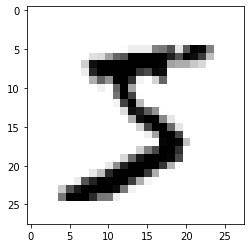

In [6]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [7]:
print(x_train[0])
# pixels have values between 0 and 255

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Normalizing the data

In [8]:
x_train = tf.keras.utils.normalize(x_train, axis= 1) 
#normalizes a numpy array, (L2 norm)

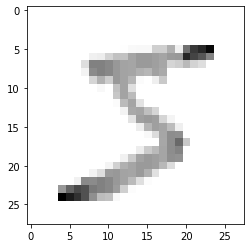

In [9]:
plt.imshow(x_train[0], cmap= plt.cm.binary)

In [10]:
print(x_train[0])
#as we can see the values have been normalised to fit between 0 and 1  
#this makes it easier for the model to learn

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
x_test = tf.keras.utils.normalize(x_train, axis= 1) 

# creating the model 

In [11]:
from tensorflow.python.ops.gen_nn_ops import softmax
from tensorflow.python.ops.gen_math_ops import sigmoid
from os import access
model = tf.keras.models.Sequential()

#creating our input layer
model.add(tf.keras.layers.Flatten())

#we'll be using the rectified linear function,the default activation function for like 95%of the use cases
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

model.add(tf.keras.layers.Dense(10, activation=softmax))
#done with the model, now lets compile it 
#models do not maximize the accuracy but instead minimize loss


model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])

In [ ]:
model.fit(x_train,y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2623 - accuracy: 0.9227
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1064 - accuracy: 0.9675
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0739 - accuracy: 0.9764
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0551 - accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0428 - accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0333 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0249 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0222 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0175 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.016

In [ ]:
model.save("keras_tutorial")
new_model= tf.keras.models.load_model('keras_tutorial')

INFO:tensorflow:Assets written to: keras_tutorial/assets


# Predicting

In [ ]:
prediction = new_model.predict([x_test])
#takes in  input as a list

print(prediction)

[[8.9235719e-25 3.0374138e-17 3.3155865e-23 ... 4.3794622e-20
  1.9339483e-17 5.8650262e-14]
 [1.0000000e+00 2.7733997e-13 9.5592745e-10 ... 5.7672069e-11
  1.2886154e-12 6.1860083e-12]
 [9.1174676e-18 4.6366647e-10 8.0467188e-11 ... 6.5595779e-11
  3.7376469e-12 4.9789405e-11]
 ...
 [6.1765059e-27 7.7013084e-21 1.9697799e-29 ... 1.9937254e-25
  1.3862305e-14 3.9109022e-14]
 [1.1374893e-09 5.4922435e-11 3.1061298e-14 ... 6.9470062e-11
  7.9736928e-10 5.3836199e-15]
 [1.1787502e-09 2.3170842e-14 3.4409808e-10 ... 3.8840017e-13
  1.0000000e+00 3.1867193e-09]]


Checking it with our model 

In [ ]:
print(np.argmax(prediction[9]))

4


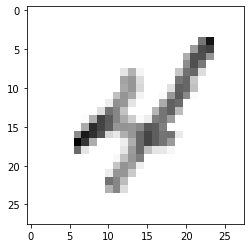

In [ ]:
plt.imshow(x_test[9], cmap =plt.cm.binary)

here we have it, our first handwriting recognition deep model 